In [1]:
from deimkit import list_models, load_model, save_only_ema_weights

In [2]:
list_models()

['deim_hgnetv2_n',
 'deim_hgnetv2_s',
 'deim_hgnetv2_m',
 'deim_hgnetv2_l',
 'deim_hgnetv2_x']

In [3]:
save_only_ema_weights("/home/dnth/Desktop/DEIMKit/nbs/outputs/deim_hgnetv2_s_vehicles/best.pth")

2025-03-11 23:47:08.411 | INFO     | deimkit.utils:save_only_ema_weights:8 - Loading checkpoint from /home/dnth/Desktop/DEIMKit/nbs/outputs/deim_hgnetv2_s_vehicles/best.pth
/home/dnth/Desktop/DEIMKit/src/deimkit/utils.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the lo

In [4]:
model = load_model(
    "deim_hgnetv2_s",
    checkpoint="/home/dnth/Desktop/DEIMKit/nbs/outputs/deim_hgnetv2_s_vehicles/best_ema_weights.pth",
    class_names=[
        "background"
        "vehicles",
        "big bus",
        "big truck",
        "bus-l-",
        "bus-s-",
        "car",
        "mid truck",
        "small bus",
        "small truck",
        "truck-l-",
        "truck-m-",
        "truck-s-",
        "truck-xl-",
    ],
    image_size=(320, 320),
)

2025-03-11 23:47:08.592 | INFO     | deimkit.predictor:__init__:108 - Initializing Predictor with device=auto
2025-03-11 23:47:08.630 | INFO     | deimkit.predictor:_setup_device:155 - Auto-selected device: cuda
2025-03-11 23:47:08.631 | INFO     | deimkit.predictor:__init__:119 - Using custom image size: (320, 320)
2025-03-11 23:47:08.632 | INFO     | deimkit.predictor:_get_checkpoint_path:165 - Using custom checkpoint: /home/dnth/Desktop/DEIMKit/nbs/outputs/deim_hgnetv2_s_vehicles/best_ema_weights.pth
/home/dnth/Desktop/DEIMKit/src/deimkit/predictor.py:198: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. Thi

In [5]:
result = model.predict(
    "/home/dnth/Downloads/vehicles.v2-release.coco/test/adit_mp4-1002_jpg.rf.5e4018e963af1251b3f7e6fd487c479e.jpg",
    visualize=True,
    conf_threshold=0.17,
)

2025-03-11 23:47:08.939 | DEBUG    | deimkit.predictor:predict:378 - Loading image from path: /home/dnth/Downloads/vehicles.v2-release.coco/test/adit_mp4-1002_jpg.rf.5e4018e963af1251b3f7e6fd487c479e.jpg
2025-03-11 23:47:09.222 | DEBUG    | deimkit.predictor:_process_single_image:436 - Prediction complete. Found 27 objects
2025-03-11 23:47:09.223 | DEBUG    | deimkit.predictor:_process_single_image:448 - Generating visualization


In [6]:
result

PredictionResult(boxes=array([[352.44653, 326.85275, 424.44757, 403.63004],
       [388.8147 , 234.23215, 437.38754, 280.47125],
       [442.6551 , 199.54181, 556.77374, 309.1618 ],
       [318.73312, 233.12881, 365.43738, 282.69006],
       [358.17947, 197.4662 , 391.44385, 227.47856],
       [293.41223, 170.6609 , 319.66476, 194.97652],
       [327.08252, 263.04318, 383.4999 , 326.11227],
       [383.6377 , 185.76213, 411.79764, 213.36539],
       [305.3872 , 209.18826, 345.36316, 242.07013],
       [386.59073, 401.78943, 507.1853 , 476.81094],
       [428.5996 , 268.01266, 510.87762, 350.0951 ],
       [410.32098, 201.06618, 448.83112, 231.04233],
       [155.24565, 145.54883, 200.2165 , 196.15753],
       [428.5996 , 268.01266, 510.87762, 350.0951 ],
       [289.053  , 154.5638 , 310.51923, 173.1902 ],
       [306.53345, 194.65266, 337.9148 , 220.04756],
       [442.6551 , 199.54181, 556.77374, 309.1618 ],
       [304.68735, 192.9152 , 333.21844, 217.17325],
       [317.9092 , 145.

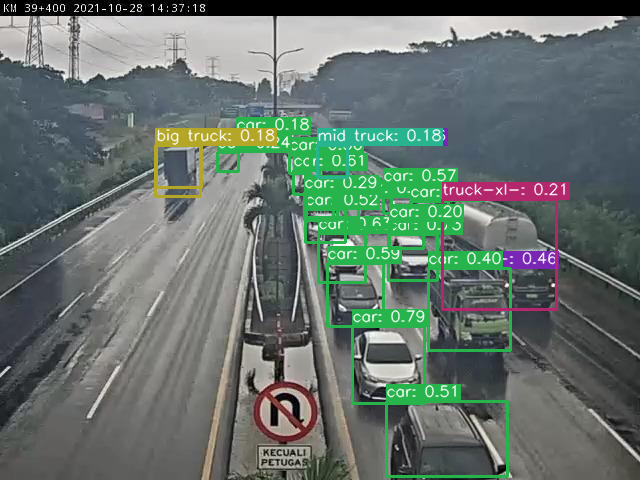

In [7]:
result.visualization

In [8]:
# Load folder of images
import glob

image_paths = glob.glob("/home/dnth/Downloads/vehicles.v2-release.coco/test/*.jpg")

image_paths


['/home/dnth/Downloads/vehicles.v2-release.coco/test/aditganteng_mp4-69_jpg.rf.e28fe5f9d24c4d44562807df45d01489.jpg',
 '/home/dnth/Downloads/vehicles.v2-release.coco/test/adit_mp4-966_jpg.rf.ffa722a51958b4374aa3f40558279bec.jpg',
 '/home/dnth/Downloads/vehicles.v2-release.coco/test/malam_04112021_mp4-25_jpg.rf.0f80f5233fa368809e2b71a3ca281f03.jpg',
 '/home/dnth/Downloads/vehicles.v2-release.coco/test/malam_04112021_mp4-121_jpg.rf.8d35115898e794407be59bbdb8e92194.jpg',
 '/home/dnth/Downloads/vehicles.v2-release.coco/test/aditganteng_mp4-633_jpg.rf.5bbff6773514dd4ec46ef7233296ce4e.jpg',
 '/home/dnth/Downloads/vehicles.v2-release.coco/test/adit_mp4-328_jpg.rf.92aab3aa0026ebef9348a340ab90359f.jpg',
 '/home/dnth/Downloads/vehicles.v2-release.coco/test/adit_mp4-1315_jpg.rf.55bb6f192037113ad36fe2db8f3d0ec4.jpg',
 '/home/dnth/Downloads/vehicles.v2-release.coco/test/siang_15112021_1_mp4-341_jpg.rf.01366c2de405175af4c00bb7a6e6902b.jpg',
 '/home/dnth/Downloads/vehicles.v2-release.coco/test/pagi_1

In [11]:
results = model.predict_batch(image_paths[10:16], conf_threshold=0.2, visualize=True)

2025-03-11 23:47:20.482 | INFO     | deimkit.predictor:predict_batch:486 - Processing batch of 6 images with batch_size=16
2025-03-11 23:47:20.482 | DEBUG    | deimkit.predictor:_process_image_batch:523 - Loading image 0 from path: /home/dnth/Downloads/vehicles.v2-release.coco/test/adit_mp4-1428_jpg.rf.8293f3a5e4a4fe3f04ad027056375dba.jpg
2025-03-11 23:47:20.486 | DEBUG    | deimkit.predictor:_process_image_batch:523 - Loading image 1 from path: /home/dnth/Downloads/vehicles.v2-release.coco/test/siang_15112021_1_mp4-129_jpg.rf.6971d23c381c033bc108e69a57a15fcb.jpg
2025-03-11 23:47:20.491 | DEBUG    | deimkit.predictor:_process_image_batch:523 - Loading image 2 from path: /home/dnth/Downloads/vehicles.v2-release.coco/test/siang_15112021_1_mp4-113_jpg.rf.b8b7f1baae7e7e0b19764d78093f3ca9.jpg
2025-03-11 23:47:20.495 | DEBUG    | deimkit.predictor:_process_image_batch:523 - Loading image 3 from path: /home/dnth/Downloads/vehicles.v2-release.coco/test/adit_mp4-1735_jpg.rf.247bc1a7ded513bd2de2

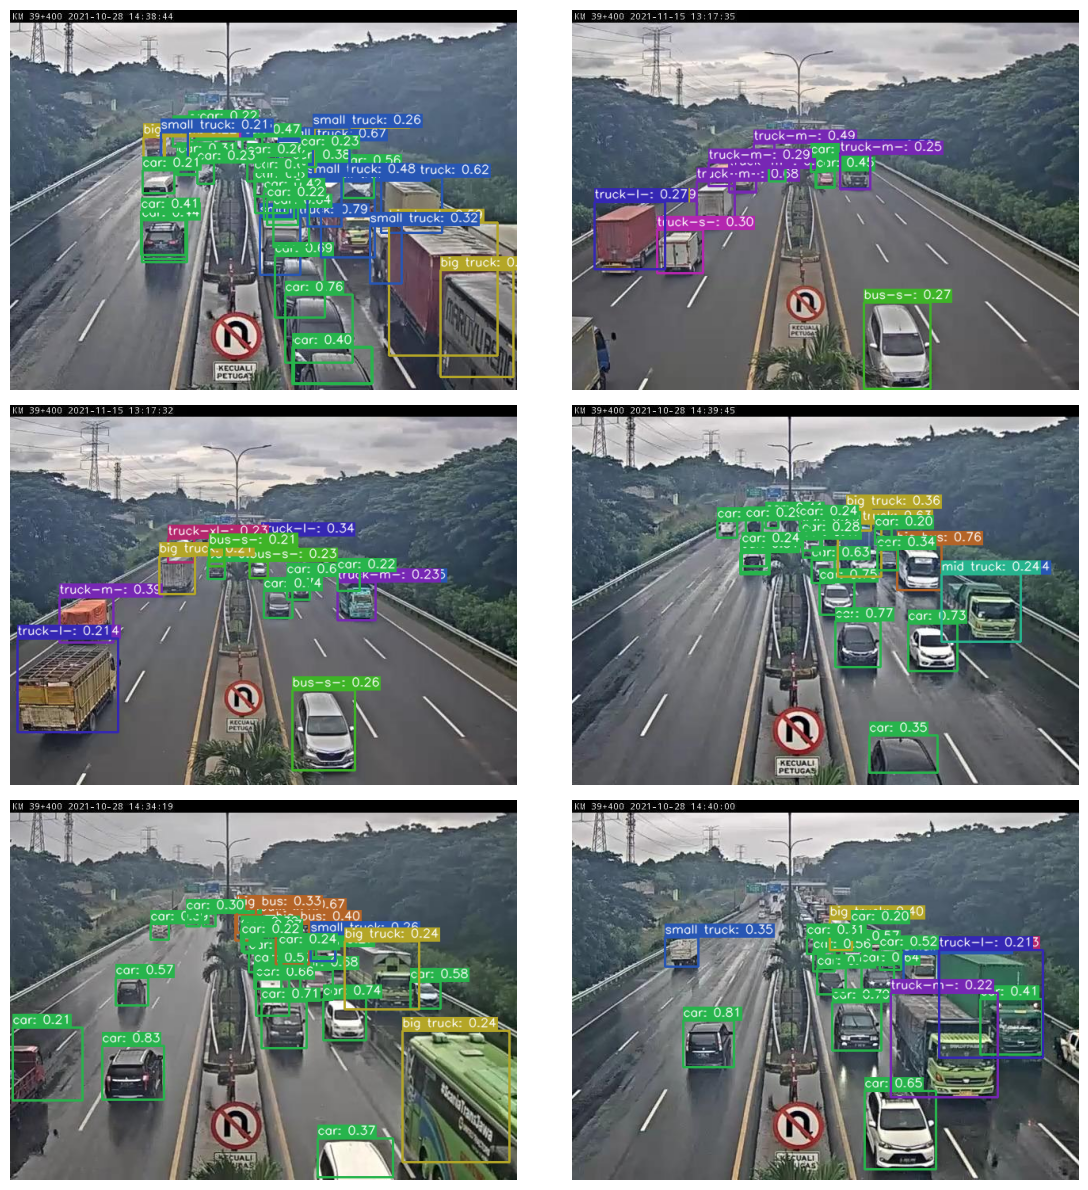

In [12]:
# Plot results in a grid
import matplotlib.pyplot as plt
import math

n_cols = 2
n_rows = math.ceil(len(results) / n_cols)
plt.figure(figsize=(12, 4 * n_rows))

for i, result in enumerate(results):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(result.visualization)
    plt.axis("off")
plt.tight_layout()
plt.show()